# Project Name: Micro-Credit Defaulter 

About Project: We are going to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

In [1]:
#Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Dataset

ds= pd.read_csv("MicroCreditDefaulter.csv")
ds

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [3]:
#Fittng data in Pandas DataFrame

df= pd.DataFrame(data=ds)
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
df.shape

(209593, 37)

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

Observations: We can see that for all of the variable columns count is same that means no Null value Present in dataset. The Columns such as aon, daily_decr30, daily_decr90 etc. having min. is given in negative number and also max. value is very high.

# Data Cleaning and Feature Engineeering

In [9]:
#Droping Unnamed column and Single value column pcircle
df= df.drop([df.columns[0], "pcircle", "msisdn"],  axis=1)

In [10]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   amnt_loans30  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
0            12              6.0                 0.0          2.0   
1            12             12.0                 0.0          1.0   
2             6              6.0                 0.0          1.0   
3            12              6.0                 0.0          2.0   
4            42              6.0                 0.0          7.0   

   amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  payback90  \
0            12                6                 0.0  29.000000  29.000000   
1            12               12                 0.0   0.000000   0.000000   
2             6                6                 0.0   0.000000   0.000000   
3            12                6                 0.0   0.000000   0.000000   
4            42                6                 0.0   2.333333   2.333333   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 34 columns]

In [11]:
#Extracting Day and month from Date column

pdate= pd.to_datetime(df["pdate"])
df["Month"]= pd.DatetimeIndex(df["pdate"]).month
df["pdate"]= pd.DatetimeIndex(df["pdate"]).day

In [12]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pdate  Month  
0                6                 0.0  29.000000  29.000000     20      7  
1               12                 0.0   0.000000   0.000000     10      8  
2                6                 0.0   0.000000   0.000000     19      8  
3                6                 0.0   0.000000   0.000000      6      6  
4                6                 0.0   2.333333   2.333333     22      6  

[5 rows x 35 columns]

In [13]:
#Checking for Null values

df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
Month                   0
dtype: int64

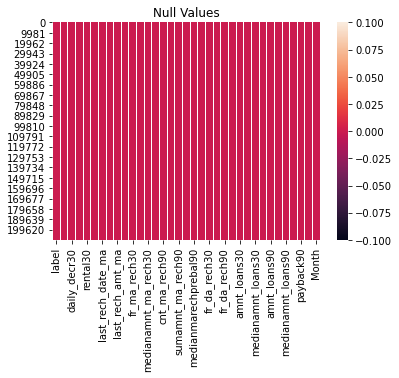

In [14]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: No null values are present in Dataset.

# EDA

1    183431
0     26162
Name: label, dtype: int64


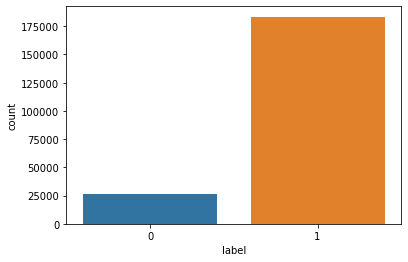

In [15]:
#Univariate Analysis

print(df['label'].value_counts())
sns.countplot(df['label'])

Observations: We can see that maximum customers are Non-Defaulter.

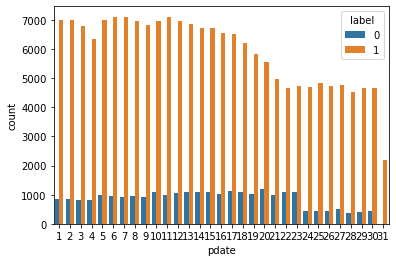

In [16]:
sns.countplot('pdate', hue= 'label', data= df)

Observations: We can see that in month end day there is no any Defaulter.

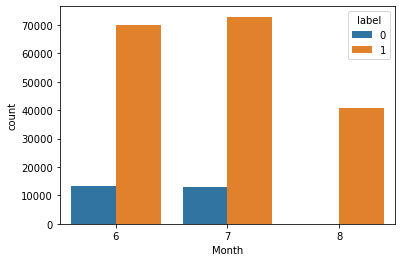

In [17]:
sns.countplot('Month', hue= 'label', data= df)

Observations: We can see that in month of August there is no any Defaulter.

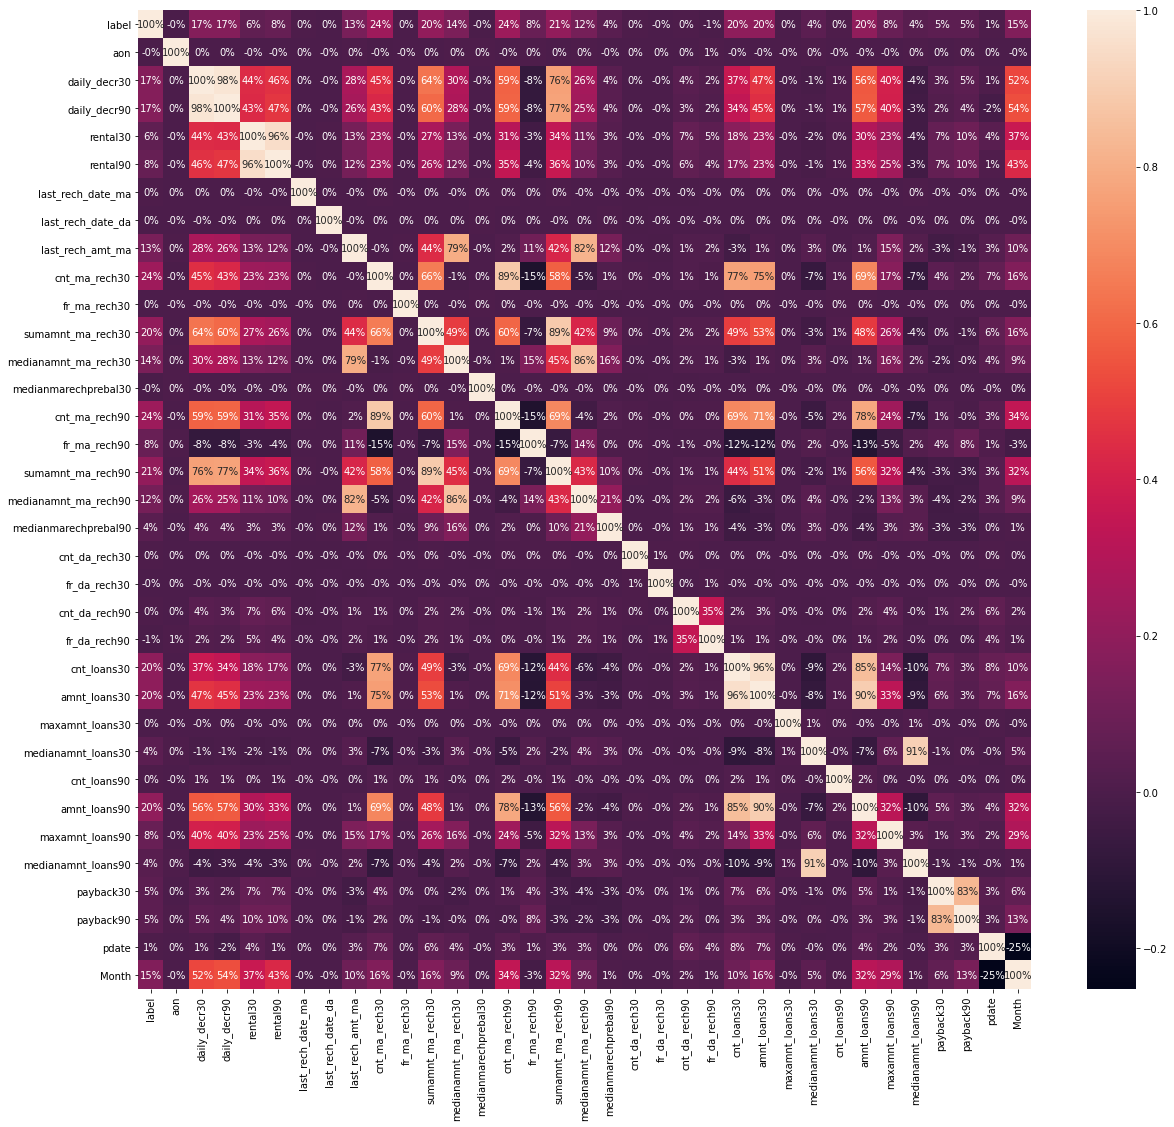

In [18]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: Label is highly positively correlated with cnt_ma_rech30, cnt_ma_rech90 etc.

In [19]:
#Dropping Columns which are 0% correlated with Labels

df= df.drop(['cnt_loans90', 'maxamnt_loans30', 'cnt_da_rech90', 'fr_da_rech30', 'cnt_da_rech30', 'medianmarechprebal30', 'fr_ma_rech30', 'last_rech_date_ma', 'last_rech_date_da', 'aon'], axis=1)

label                      AxesSubplot(0.125,0.749828;0.0945122x0.130172)
daily_decr30            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
daily_decr90            AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
rental30                AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
rental90                AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
last_rech_amt_ma        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
cnt_ma_rech30           AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
sumamnt_ma_rech30          AxesSubplot(0.125,0.593621;0.0945122x0.130172)
medianamnt_ma_rech30    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
cnt_ma_rech90           AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
fr_ma_rech90            AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
sumamnt_ma_rech90       AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
medianamnt_ma_rech90    AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
medianmarechprebal90    AxesSubplot(0.

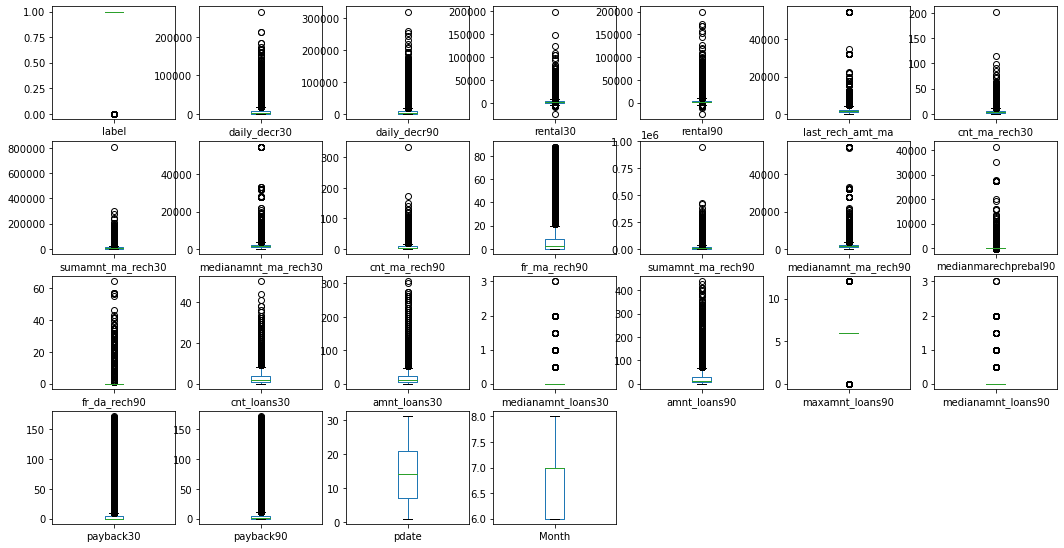

In [20]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (5,7), figsize=(18,12))

Observations: We can see that there outliers presents in almost all columns.

In [21]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

label  daily_decr30  daily_decr90  rental30  rental90  \
0           0   3055.050000   3065.150000    220.13    260.13   
1           1  12122.000000  12124.750000   3691.26   3691.26   
2           1   1398.000000   1398.000000    900.13    900.13   
3           1     21.228000     21.228000    159.42    159.42   
4           1    150.619333    150.619333   1098.90   1098.90   
...       ...           ...           ...       ...       ...   
209588      1    151.872333    151.872333   1089.19   1089.19   
209589      1     36.936000     36.936000   1728.36   1728.36   
209590      1  11843.111667  11904.350000   5861.83   8893.20   
209591      1  12488.228333  12574.370000    411.83    984.58   
209592      1   4489.362000   4534.820000    483.92    631.20   

        last_rech_amt_ma  cnt_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2             3078.0   
1                   5787              1             5787.0   
2                   1539              1             1539.0   
3                    947              0                0.0   
4                   2309              7            20029.0   
...                  ...            ...                ...   
209588              4048              3            10404.0   
209589               773              4             3092.0   
209590              1539              5             9334.0   
209591               773              5            12154.0   
209592              7526              2             9065.0   

        medianamnt_ma_rech30  cnt_ma_rech90  ...  cnt_loans30  amnt_loans30  \
0                     1539.0              2  ...            2            12   
1                     5787.0              1  ...            1            12   
2                     1539.0              1  ...            1             6   
3                        0.0              1  ...            2            12   
4                     2309.0              8  ...            7            42   
...                      ...            ...  ...          ...           ...   
209588                3178.0              3  ...            2            12   
209589                 773.0              6  ...            3            18   
209590                1539.0             11  ...            4            42   
209591                 773.0              6  ...            2            18   
209592                4532.5              3  ...            2            18   

        medianamnt_loans30  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0                      0.0            12                6                 0.0   
1                      0.0            12               12                 0.0   
2                      0.0             6                6                 0.0   
3                      0.0            12                6                 0.0   
4                      0.0            42                6                 0.0   
...                    ...           ...              ...                 ...   
209588                 0.0            12                6                 0.0   
209589                 0.0            18                6                 0.0   
209590                 0.0            54               12                 0.0   
209591                 0.0            24               12                 0.0   
209592                 0.0            18               12                 0.0   

        payback30  payback90  pdate  Month  
0       29.000000  29.000000     20      7  
1        0.000000   0.000000     10      8  
2        0.000000   0.000000     19      8  
3        0.000000   0.000000      6      6  
4        2.333333   2.333333     22      6  
...           ...        ...    ...    ...  
209588   1.000000   1.000000     17      6  
209589   1.000000   1.000000     12      6  
209590   4.000000   3.833333     29      7  
209591   0.000000  10.500000     25      7  
209592   0.000000   0.000000      7      7  

[169911 rows x 25 c

In [22]:
df= df_new

In [23]:
#Splitting DATA

x= df.drop('label', axis=1)
y= df[['label']]
print(x.shape)
print(y.shape)

(169911, 24)
(169911, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDA49A1280>,
      dtype=object)

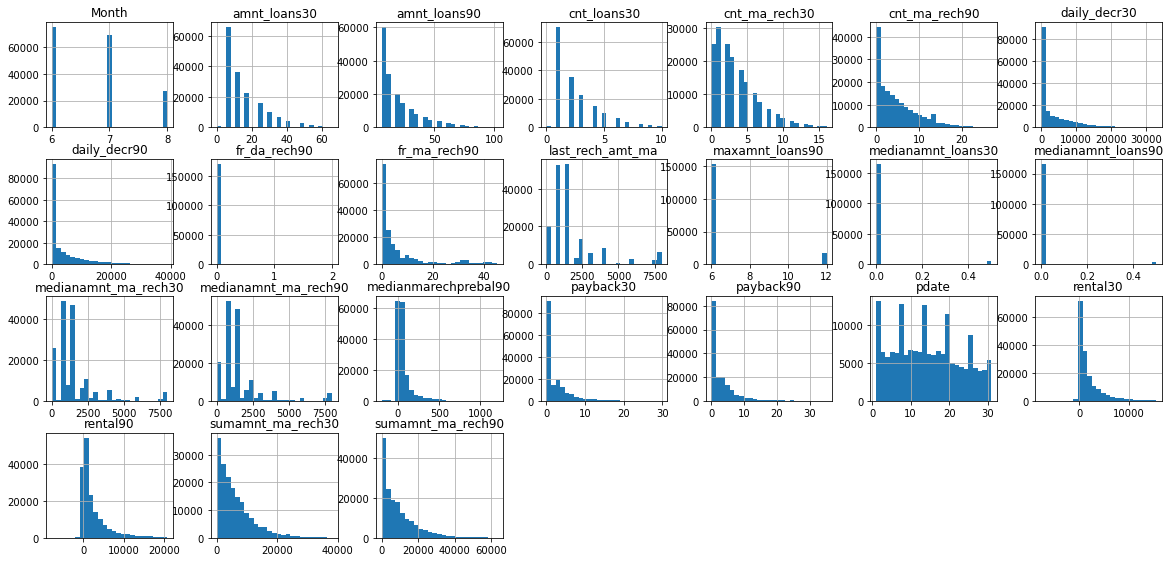

In [24]:
x.hist(figsize=(20,12), layout= (5,7), grid= True, bins=25)

Observations: We can see that most of columns are with Right Skewed data.

In [25]:
x.skew()

daily_decr30             1.960544
daily_decr90             2.074719
rental30                 2.194306
rental90                 2.242482
last_rech_amt_ma         2.125557
cnt_ma_rech30            1.173387
sumamnt_ma_rech30        1.631699
medianamnt_ma_rech30     2.325874
cnt_ma_rech90            1.318110
fr_ma_rech90             1.983354
sumamnt_ma_rech90        1.703959
medianamnt_ma_rech90     2.373303
medianmarechprebal90     3.697595
fr_da_rech90            48.498884
cnt_loans30              1.465197
amnt_loans30             1.439681
medianamnt_loans30       5.346029
amnt_loans90             1.692563
maxamnt_loans90          2.680282
medianamnt_loans90       6.104944
payback30                2.607510
payback90                2.523879
pdate                    0.185597
Month                    0.474782
dtype: float64

In [26]:
#Removing skeweness
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

pt= PowerTransformer(method= 'yeo-johnson', standardize= True)

for i in x.columns:
    x[i]= pt.fit_transform(x[i].values.reshape(-1,1))

In [27]:
x.skew()

daily_decr30            -1.895596
daily_decr90            -2.017115
rental30                 0.207242
rental90                 0.232744
last_rech_amt_ma        -0.185231
cnt_ma_rech30           -0.026736
sumamnt_ma_rech30       -0.457702
medianamnt_ma_rech30    -0.312778
cnt_ma_rech90           -0.030207
fr_ma_rech90             0.142282
sumamnt_ma_rech90       -0.365611
medianamnt_ma_rech90    -0.175220
medianmarechprebal90     0.993948
fr_da_rech90            42.940561
cnt_loans30              0.086666
amnt_loans30            -0.003099
medianamnt_loans30       5.346029
amnt_loans90             0.123042
maxamnt_loans90          2.680282
medianamnt_loans90       6.104944
payback30                0.306614
payback90                0.208602
pdate                   -0.161471
Month                    0.125370
dtype: float64

In [28]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0           0.580645      0.553703 -0.625708 -0.617771          0.182033   
1           1.308774      1.255257  0.689810  0.434217          1.760211   
2           0.237096      0.218733 -0.323189 -0.386077          0.182033   
3          -0.988525     -0.984191 -0.656932 -0.660022         -0.221951   
4          -0.525021     -0.526335 -0.242767 -0.320517          0.582819   
...              ...           ...       ...       ...               ...   
169906     -0.522694     -0.524046 -0.246643 -0.323674          1.252038   
169907     -0.874188     -0.870832 -0.000252 -0.123420         -0.369614   
169908      1.295017      1.244819  1.391242  1.734451          0.182033   
169909      1.326445      1.276068 -0.533918 -0.357977         -0.369614   
169910      0.767239      0.737686 -0.501171 -0.478537          2.181201   

        cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  \
0           -0.247716          -0.091736              0.306173      -0.539635   
1           -0.778578           0.354975              1.881519      -0.986172   
2           -0.778578          -0.484539              0.306173      -0.986172   
3           -1.621797          -1.857356             -1.912419      -0.986172   
4            1.162484           1.564427              0.706149       0.796098   
...               ...                ...                   ...            ...   
169906       0.146845           0.864031              1.068382      -0.208164   
169907       0.463554          -0.088851             -0.244228       0.473422   
169908       0.729459           0.762138              0.306173       1.178704   
169909       0.729459           1.016618             -0.244228       0.473422   
169910      -0.247716           0.735311              1.527132      -0.208164   

        fr_ma_rech90  ...  cnt_loans30  amnt_loans30  medianamnt_loans30  \
0           1.387695  ...     0.067757     -0.039500           -0.180933   
1          -1.173457  ...    -0.988323     -0.039500           -0.180933   
2          -1.173457  ...    -0.988323     -0.986680           -0.180933   
3          -1.173457  ...     0.067757     -0.039500           -0.180933   
4          -0.022553  ...     1.711744      1.691963           -0.180933   
...              ...  ...          ...           ...                 ...   
169906     -0.022553  ...     0.067757     -0.039500           -0.180933   
169907     -0.022553  ...     0.663697      0.523605           -0.180933   
169908      0.552227  ...     1.054351      1.691963           -0.180933   
169909      0.410882  ...     0.067757      0.523605           -0.180933   
169910      1.335490  ...     0.067757      0.523605           -0.180933   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0          -0.142776        -0.331979           -0.159629   1.846334   
1          -0.142776         3.012238           -0.159629  -0.913819   
2          -1.168114        -0.331979           -0.159629  -0.913819   
3          -0.142776        -0.331979           -0.159629  -0.913819   
4           1.286921        -0.331979           -0.159629   0.679329   
...              ...              ...                 ...        ...   
169906     -0.142776        -0.331979           -0.159629   0.131728   
169907      0.380121        -0.331979           -0.159629   0.131728   
169908      1.511128         3.012238           -0.159629   1.014806   
169909      0.715491         3.012238           -0.159629  -0.913819   
169910      0.380121         3.012238           -0.159629  -0.913819   

        payback90     pdate     Month  
0        1.883542  0.715426  0.549589  
1       -0.989006 -0.407134  1.550004  
2       -0.989006  0.614193  1.550004  
3       -0.989006 -0.963839 -1.066073  
4        0.478166  0.912536 -1.066073  
...           ...       ...       ...  
169906  -0.061218  0.405735 -1.066073  
169907  -0.061218 -0.158

In [29]:
#Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.8779181543531996
220


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=220)

In [32]:
x_train.shape

(118937, 24)

In [33]:
x_test.shape

(50974, 24)

In [35]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.8779181543531996

GaussianNB() Acuracy score -
0.7548554164868364

SVC() Acuracy score -
0.9090124377133441

KNeighborsClassifier() Acuracy score -
0.9047161297916585

DecisionTreeClassifier() Acuracy score -
0.8788009573508063

RandomForestClassifier() Acuracy score -
0.9168399576254561

AdaBoostClassifier() Acuracy score -
0.9066779142307844

[20:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child

In [36]:
#Now we will consider for Imbalencing

from imblearn.over_sampling import SMOTE

x_train_over, y_train_over = SMOTE(k_neighbors=3).fit_resample(x, y)

In [37]:
x_train_over.shape

(292654, 24)

In [38]:
y_train_over

label
0           0
1           1
2           1
3           1
4           1
...       ...
292649      0
292650      0
292651      0
292652      0
292653      0

[292654 rows x 1 columns]

In [61]:
#Use BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier()
brf.fit(X_train,Y_train)
brf.score(X_train,Y_train)

0.9075813245667874

In [47]:
#Finding Best Random State for x_train_over and y_train_over

maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x_train_over,y_train_over, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.7738191509960477
306


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_train_over,y_train_over, test_size=.3, random_state=306)

In [49]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.7738191509960477

GaussianNB() Acuracy score -
0.7577138171008121

SVC() Acuracy score -
0.8549153160130756

KNeighborsClassifier() Acuracy score -
0.8969099171953484

DecisionTreeClassifier() Acuracy score -
0.9038463728829004

RandomForestClassifier() Acuracy score -
0.946456029249291

AdaBoostClassifier() Acuracy score -
0.8414752212490176

[00:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_

Observations: We can see that we will select XGBClassifier model as it giving best result with and without imbalencing.

In [50]:
#Hyperparameter Tuning for Best selected model XGBClassifier

from sklearn.model_selection import GridSearchCV
from scipy import stats
from scipy.stats import randint


parameters= {'n_estimators': [150, 1000],
              'learning_rate': [0.01, 0.6],
              'subsample': [0.3, 0.9],
              'max_depth': [8, 9]
             }

GSV= GridSearchCV(xgb, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

[09:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:10:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'learning_rate': 0.6, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.9}

In [51]:
GCV_pred= GSV.best_estimator_.predict(x_test)
print('accuracy_score - ', accuracy_score(y_test, GCV_pred))
print(confusion_matrix(y_test, GCV_pred))
print(classification_report(y_test, GCV_pred))

accuracy_score -  0.9450095105755322
[[40935  2607]
 [ 2221 42034]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     43542
           1       0.94      0.95      0.95     44255

    accuracy                           0.95     87797
   macro avg       0.95      0.94      0.95     87797
weighted avg       0.95      0.95      0.95     87797



Observations: We got XGBClassifier model which gives accuracy score of 94.50% and f1-score increased upto 95%.

In [52]:
# Plotting AUC-ROC curve for best model- XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [53]:
y_pred_prob= GSV.best_estimator_.predict_proba(x_test)[:,1]
y_pred_prob

array([0.9786064 , 0.00280066, 0.83087254, ..., 0.9696342 , 0.39391774,
       0.99730337], dtype=float32)

In [54]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [55]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99878278, 0.99882872,
       1.        ])

In [56]:
tpr

array([0.        , 0.14716981, 0.18678115, ..., 1.        , 1.        ,
       1.        ])

In [57]:
thresholds

array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 4.2966732e-13,
       3.9073031e-13, 9.5364581e-17], dtype=float32)

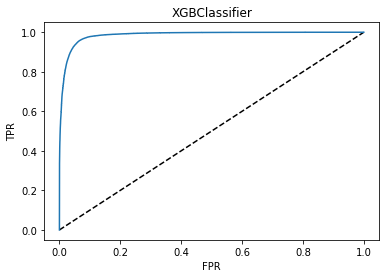

In [58]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'XGBClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('XGBClassifier')
plt.show()

Observations: We can observe that A plot of the ROC Curve confirms the AUC interpretation of a best model for most probability thresholds.

In [59]:
print(roc_auc_score(y_test, GSV.best_estimator_.predict(x_test)))

0.9449701772677471


In [60]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'micro_credti_defaulter_best_XGB_model_for_Imbalancing.obj')

['micro_credti_defaulter_best_XGB_model_for_Imbalancing.obj']